# GRIPMAR'23 | The Sparks Foundation

## Data Science & Business Analytics Internship

### Author - Prasun Maji

## #Task1 - Prediction using Supervised ML

# Predict the percentage of an student based on the no. of study hours
In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just 2 variables.

### Step 1 - Importing the dataset 
In this step, we will import the dataset through the link with the help of pandas library and then we will observe the data.

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the csv file from remote link & reading the data

url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Importing Data Successfully")

Importing Data Successfully


In [3]:
# Observing the data

data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# To find more information about our dataset
# Analysing the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Inspecting the data

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# Checking for any null or missings values

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

From above analysis we can see that there is no null values present in our dataset so we can now move on to our next step.

### Step 2 - Visualizing the dataset
In this step, we will plot the dataset to check whether we can observe any relation between the two variables or not.

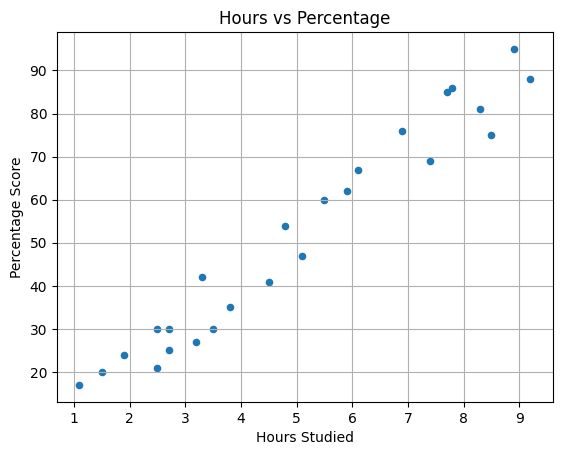

In [7]:
# Plotting the dataset into scatter plot

data.plot.scatter(x='Hours',y='Scores')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

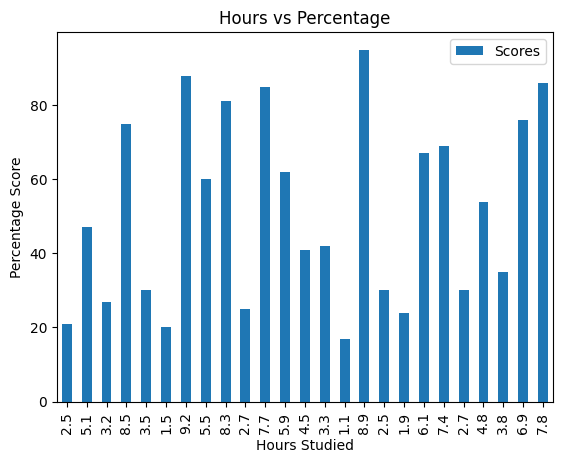

In [8]:
# Plotting the dataset into bar graph

data.plot.bar(x='Hours',y='Scores')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

#### From the graph above, we can observe that there is a positive linear relationship between "hours studied" and "percentage score". So, we can use the linear regression supervised machine model on it to predict further values.

In [9]:
# We can also use .corr to determine the corelation between the variables

data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Step 3 - Data preparation
In this step, we will divide the data into "attributes" (inputs) and "labels" (outputs). After that we will split the whole dataset into 2 parts - training data and testing data.

In [10]:
# Using iloc function we will divide the data

x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [11]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [13]:
# Using train_test_split() method we will split the data into training and testing sets

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Step 4 - Training the algorithm
We have splited our data into training and testing sets, and now we will train our algorithm.

In [14]:
# Training the algorithm

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train) 
print("Training complete")

Training complete


### Step 5 - Visualizing the model
After training the model, now its time to visualize it.

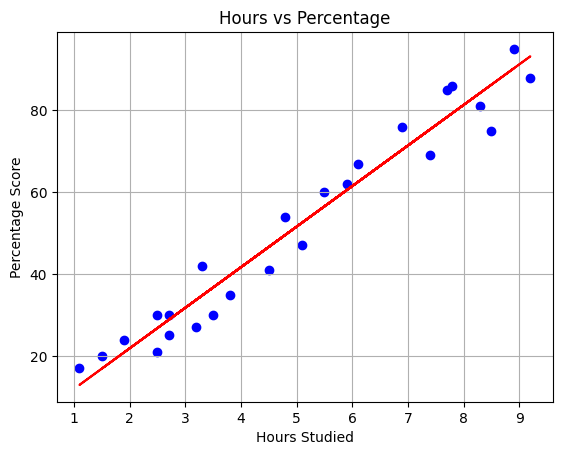

In [15]:
# Plotting the regression line

line = regressor.coef_*x + regressor.intercept_

# Plotting for the test data

plt.scatter(x, y, color='blue')
plt.plot(x, line, color='red');
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

#### The plot confirms that it is a best fit line.

### Step 6 - Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [16]:
# Testing data

print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
# Predicting the scores

y_pred = regressor.predict(x_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [18]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


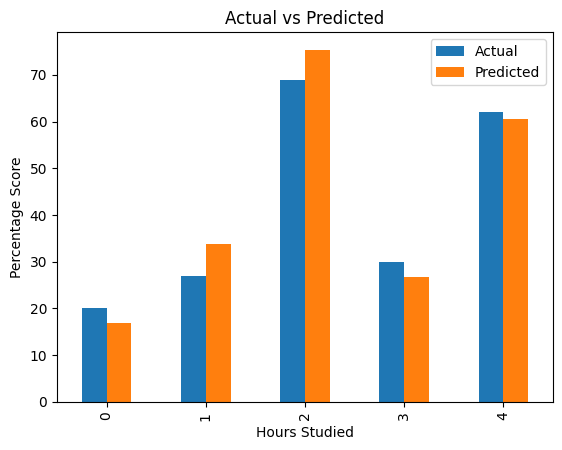

In [19]:
# Plotting the actual vs predicted data

df.plot(kind='bar')
plt.title('Actual vs Predicted')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### Now, it's time to predict the given data

In [20]:
hours = [[9.25]]
pred = regressor.predict(hours)
print("The predicted score if a person studies for",hours,"hours is",pred[0])

The predicted score if a person studies for [[9.25]] hours is 93.69173248737535


### Step 7 - Evaluating the model
In the last step, we are going to evaluate our trained model by calculating mean absolute error. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
